# About the Project

The Goal of this Project is to train a machine learning model to predict heart disease, so that doctors can choose to factor this prediction into their decision-making.

The requirement is a machine learning model that can predict the risk of heart disease accurately and reliably using patient health data. As such, the model must match or exceed the performance of a human expert cardiologist. It must generalize to unseen data outside of its training set, such as new patient data, returning timeous predictions whenever required - even in the middle of the night when the ML engineer is unavailable. The model design process should be secure - sensitive training data should be handled in a safe and private environment, and the deployed model should be monitored continuously and retrained whenever necessary. Finally, the model should also be as interpretable as possible: cardiologists should be able to understand the model's prediction, and disregard or overwrite it when necessary. 

In [75]:
# general imports
import matplotlib.pyplot as plt
import pandas as pd

## 1. Exploratory Data Analysis

EDA is the process of examining and analyzing data to gain insights, discover patterns, and understand the characteristics of the data. For example visualizing components of the dataset, such as the proportion of missing values. EDA is a critical stage in ML projects - it helps understand the dataset and identify any issues that could affect model performance downstream. 

In [76]:
# Load Dataset
heart_disease_df = pd.read_csv("./heart_disease_df.csv")

# Print the first 5 rows of the DataFrame
print(heart_disease_df.head(5))

# Print information about the DataFrame
print(heart_disease_df.info())

   age  sex   cp  trestbps   chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   52    1  0.0       125  212.0    0  ...      0      NaN      2   2     3       0
1   53    1  0.0       140  203.0    1  ...      1      NaN      0   0     3       0
2   70    1  0.0       145  174.0    0  ...      1      NaN      0   0     3       0
3   61    1  0.0       148  203.0    0  ...      0      NaN      2   1     3       0
4   62    0  0.0       138  294.0    1  ...      0      NaN      1   3     2       0

[5 rows x 14 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1076 entries, 0 to 1075
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1076 non-null   int64  
 1   sex       1076 non-null   int64  
 2   cp        1023 non-null   float64
 3   trestbps  1076 non-null   int64  
 4   chol      1021 non-null   float64
 5   fbs       1076 non-null   int64  
 6   restecg   1028 non-null   float64
 7   thal

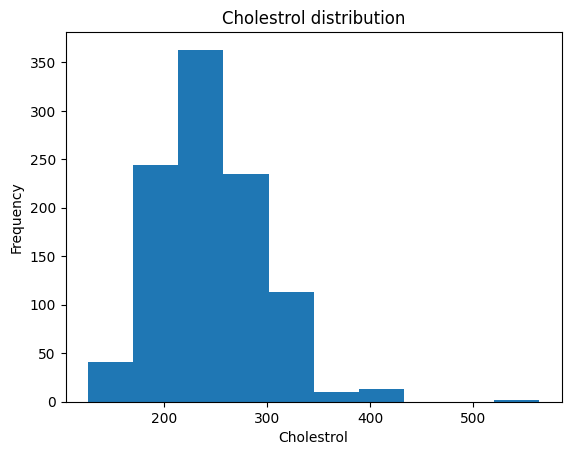

In [77]:
# Visualize the cholestrol column
heart_disease_df['chol'].plot(kind='hist')

# Set the title and axis labels
plt.title('Cholestrol distribution')
plt.xlabel('Cholestrol')
plt.ylabel('Frequency')
plt.show()

In [78]:
# Print the sex value counts of the heart disease dataset
print(heart_disease_df['sex'].value_counts())

1    743
0    333
Name: sex, dtype: int64


## 2. Data Preparation

Data preparation involves identifying and carrying out the data-cleaning steps derived from EDA. Handling issues, such as missing values, outliers and imbalances, in the dataset is critical to avoid skewing the model's performance downstream.

In [79]:
# Drop empty columns
heart_disease_column_dropped = heart_disease_df.drop('oldpeak', axis=1)

# Drop duplicate rows
heart_disease_duplicates_dropped = heart_disease_column_dropped.drop_duplicates()

# Calculate the mean value of the restecg and chol column
mean_value_rest = heart_disease_duplicates_dropped['restecg'].mean()
mean_value_chol = heart_disease_duplicates_dropped['chol'].mean()

# Impute missing values
heart_disease_duplicates_dropped['restecg'].fillna(mean_value_rest, inplace=True)
heart_disease_duplicates_dropped['cp'].fillna(0, inplace=True)
heart_disease_duplicates_dropped['chol'].fillna(mean_value_chol, inplace=True)

print(heart_disease_duplicates_dropped.isna().sum())
heart_disease_clean = heart_disease_duplicates_dropped

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
slope       0
ca          0
thal        0
target      0
dtype: int64


## 3. Feature Engineering and Selection

Feature engineering is the process of creating features that enhance the performance of ML models. Feature engineering techniques allow to modify preexisting features, as well as design completely new ones, enabling the selection of a simpler model.

In [80]:
# ML imports
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import mlflow

In [81]:
heart_disease_X = heart_disease_clean.drop('target', axis=1)
heart_disease_y = heart_disease_clean['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(heart_disease_X, heart_disease_y, test_size=0.2, random_state=42)

print(X_train.head())

     age  sex   cp  trestbps   chol  ...  thalach  exang  slope  ca  thal
373   58    1  1.0       120  284.0  ...      160      0      1   0     2
806   57    1  0.0       150  276.0  ...      112      1      1   1     1
31    50    0  1.0       120  244.0  ...      162      0      2   0     2
94    62    1  1.0       128  208.0  ...      140      0      2   0     2
681   59    1  0.0       170  326.0  ...      140      1      0   0     3

[5 rows x 12 columns]


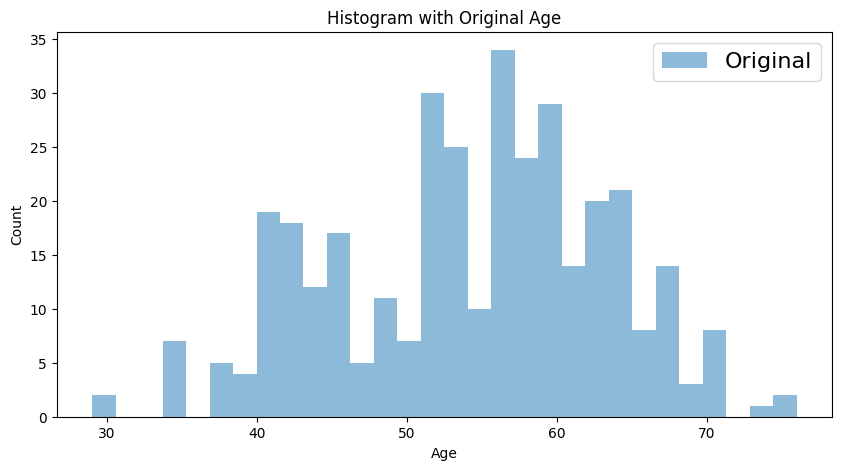

In [82]:
# Show the initial distribution of 'age'
age = X_train['age']
plt.figure(figsize=(10,5))
plt.hist(age, bins=30, alpha=0.5, label='Original')
plt.legend(prop={'size': 16})
plt.title('Histogram with Original Age'); 
plt.xlabel('Age'); plt.ylabel('Count');
plt.show()

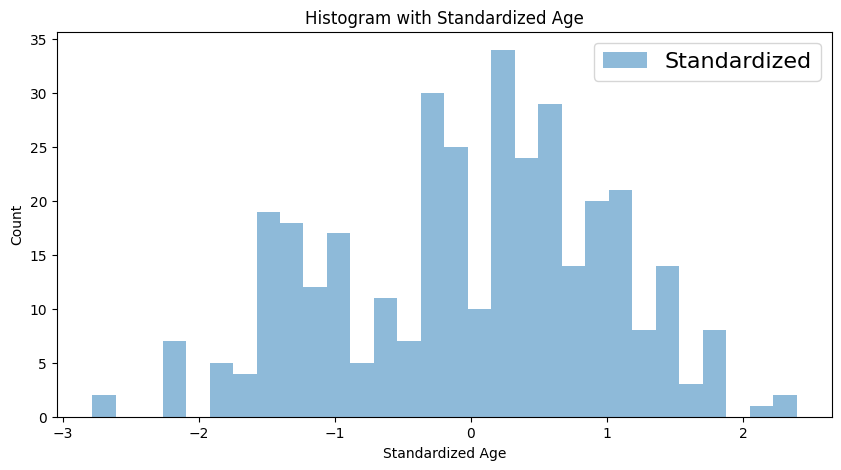

In [83]:
# Standardize 'age' on the training set and use the same standardizer to transform the 'age' column of the test set to avoid data leakage
standardizer = StandardScaler()
X_train['age'] = standardizer.fit_transform(X_train['age'].values.reshape(-1,1))
X_test['age'] = standardizer.fit_transform(X_test['age'].values.reshape(-1,1))

plt.figure(figsize=(10,5))
plt.hist(X_train['age'], bins=30, alpha=0.5, label='Standardized')
plt.legend(prop={'size': 16})
plt.title('Histogram with Standardized Age')
plt.xlabel('Standardized Age')
plt.ylabel('Count')
plt.show()

Original features: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

Selected features: Index(['cp', 'thalach', 'slope', 'ca', 'thal'], dtype='object')


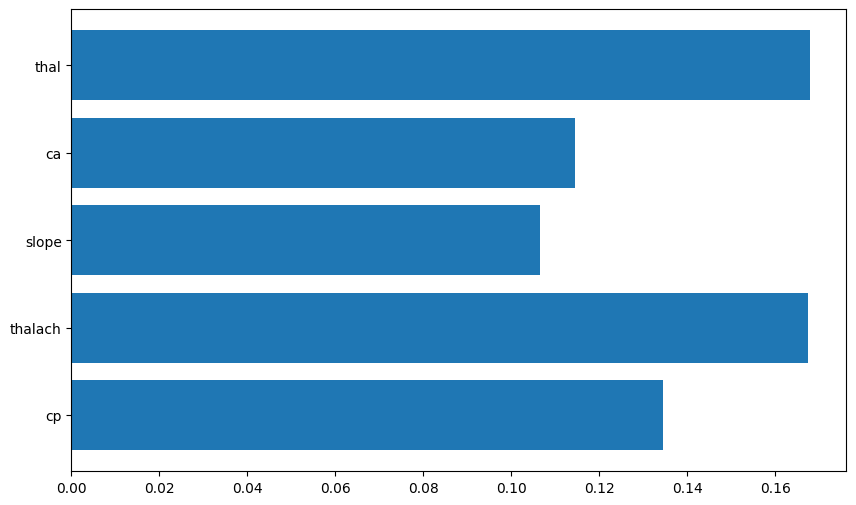

In [84]:
# Define the random forest model and fit to the training data
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
rf.fit(X_train, y_train)

# Define the feature selection object
model = SelectFromModel(rf, prefit=True)

# Transform the training features
X_train_transformed = model.transform(X_train)

original_features = heart_disease_df.columns[:-1]
print(f"Original features: {original_features}")

# Select the features deemed important by the SelectFromModel
features_bool = model.get_support()

selected_features = X_train.columns[features_bool]
print(f"\nSelected features: {selected_features}")

feature_importance = pd.DataFrame({
    "feature": selected_features,
    "importance": rf.feature_importances_[features_bool]
})
plt.figure(figsize=(10, 6))
plt.barh(feature_importance["feature"], feature_importance["importance"])
plt.show()

## 4. Model Training & ML Flow

After preforming feature selection, an appropriate model needs to be trained on the data. MLFlow keeps track of Model performance and results.

In [85]:
# Initialize the MLflow experiment
mlflow.set_experiment("Logistic Regression Heart Disease Prediction")

# Define the SVC model
svc_model = SVC(kernel='linear')
svc_model.fit(X_train, y_train)

# Get predictions from the model
y_pred = svc_model.predict(X_test)

# Start a run, log model coefficients and intercept
with mlflow.start_run():
    for idx, coef in enumerate(svc_model.coef_[0]):
        mlflow.log_param(f"coef_{idx}", idx)
    mlflow.log_metric("intercept", svc_model.intercept_[0])
	
    run_id = mlflow.active_run().info.run_id
    print(run_id)

4be10b8155864bf7a3da18d5b2524a89


## 5. Model Evaluation

Before deploying a model, it is important to evaluate its performance and accuracy. There are various ways to measure accuracy. We will perform k-fold cross validation to estimate the robustness of our model.

In [86]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix

# Create a KFold object
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Compute cross-validation score
score = cross_val_score(svc_model, heart_disease_X, heart_disease_y, scoring='balanced_accuracy', cv=kfold)
print(f"Cross-Validation Score: {score}\n")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

Cross-Validation Score: [0.83736842 0.92052632 0.80473684 0.79837838 0.8531746 ]

Confusion Matrix:
[[39 11]
 [ 4 34]]


## 6. Testing the Model
One crucial part of pre-deployment is testing. Before a model is deployed, it's essential to test that the model is not crashing, and performing as expected in reasonable time. For this project, we provide an examplary class for Unit-Testing:

In [87]:
# imports for testing
import unittest
import numpy as np

# Create a class called TestModelInference
class TestModelInference(unittest.TestCase):
	def setUp(self):
		self.model = model
		self.X_test = X_test
        
	def test_prediction_output_values(self):
		print("Running output value test case")

		y_pred = self.model.predict(self.X_test)
		unique_values = np.unique(y_pred)
		for value in unique_values:
			self.assertIn(value, [0, 1])